In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#assign the data
x = train.drop(['label'], axis=1)
y = train['label']

#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#normalization
x_train = x_train/255
x_test = x_test/255

#reshaping
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)


test_final = test/255
test_final = test_final.values.reshape(-1,28,28,1)

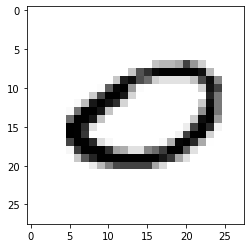

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9], cmap = plt.cm.binary)
plt.show()


In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=100)

Epoch 1/20
282/282 [==============================] - 1s 990us/step - loss: 0.5042 - accuracy: 0.8652
Epoch 2/20
282/282 [==============================] - 0s 983us/step - loss: 0.2058 - accuracy: 0.9383
Epoch 3/20
282/282 [==============================] - 0s 980us/step - loss: 0.1404 - accuracy: 0.9582
Epoch 4/20
282/282 [==============================] - 0s 987us/step - loss: 0.1066 - accuracy: 0.9686
Epoch 5/20
282/282 [==============================] - 0s 983us/step - loss: 0.0828 - accuracy: 0.9759
Epoch 6/20
282/282 [==============================] - 0s 980us/step - loss: 0.0636 - accuracy: 0.9807
Epoch 7/20
282/282 [==============================] - 0s 990us/step - loss: 0.0513 - accuracy: 0.9844
Epoch 8/20
282/282 [==============================] - 0s 987us/step - loss: 0.0401 - accuracy: 0.9887
Epoch 9/20
282/282 [==============================] - 0s 980us/step - loss: 0.0331 - accuracy: 0.9904
Epoch 10/20
282/282 [==============================] - 0s 972us/step - loss: 0.023

In [4]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

434/434 [==============================] - 0s 567us/step - loss: 0.1556 - accuracy: 0.9654
0.15561506152153015 0.9653679728507996


In [5]:
model_final = tf.keras.models.Sequential()
model_final.add(tf.keras.layers.Flatten())
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_final.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model_final.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
model_final.fit(x_train, y_train, epochs=20, batch_size=100)

preds = model_final.predict(test_final)





Epoch 1/20
282/282 [==============================] - 1s 1ms/step - loss: 0.4750 - accuracy: 0.8622
Epoch 2/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9420
Epoch 3/20
282/282 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9612
Epoch 4/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9718
Epoch 5/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9780
Epoch 6/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0543 - accuracy: 0.9828
Epoch 7/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 8/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9905
Epoch 9/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 10/20
282/282 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9937

In [6]:
preds = np.argmax(preds,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(preds)+1)), 'Label': preds})
my_submission.to_csv('your_sub.csv', index=False)


